# KNN ALGORITHM

In [151]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline 

In [152]:
df = pd.read_csv('../inputs/progBook.csv')
df.head()

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,"3,829",The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,"1,406","The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,"1,658",Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,"1,325",How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706


In [153]:
df['Type'].value_counts()

Paperback                156
Hardcover                 95
Kindle Edition            10
ebook                      7
Unknown Binding            2
Boxed Set - Hardcover      1
Name: Type, dtype: int64

In [154]:
df.drop([268], axis=0,inplace=True) #delete column with single value

print(df['Reviews'].iloc[0])

for i in range(0, df.shape[0], 1):
    df['Reviews'].iloc[i] = df['Reviews'].iloc[i].replace(',', '.')

print(df['Reviews'].iloc[0])

3,829
3.829


In [155]:
df['Type'].value_counts()

Paperback          156
Hardcover           95
Kindle Edition      10
ebook                7
Unknown Binding      2
Name: Type, dtype: int64

In [156]:
df.drop('Book_title',axis=1, inplace=True)

In [157]:
df.drop('Description',axis=1, inplace=True)

In [158]:
df.columns

Index(['Rating', 'Reviews', 'Number_Of_Pages', 'Type', 'Price'], dtype='object')

In [159]:
#I've created a numpy array of arguments from the type column and the other columns excluding the dropped columns.
X = df[['Rating', 'Reviews','Number_Of_Pages','Price']] .values 
X[0:5]

array([[4.17, '3.829', 105, 9.323529412],
       [4.01, '1.406', 527, 11.0],
       [3.33, '0', 50, 11.26764706],
       [3.97, '1.658', 393, 12.87352941],
       [4.06, '1.325', 305, 13.16470588]], dtype=object)

In [160]:
y = df['Type'].values  #I created numpy array using type feature
y[0:5]

array(['Hardcover', 'Hardcover', 'Kindle Edition', 'Hardcover',
       'Kindle Edition'], dtype=object)

In [161]:
#The data is normalized to obtain more successful results.
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.35962162, -0.55923441, -1.20798055, -1.30230741],
       [-0.19285541, -0.57698599,  0.17530894, -1.25335944],
       [-2.54088278, -0.58728675, -1.3882671 , -1.24554494],
       [-0.33097466, -0.57513977, -0.26393465, -1.19865793],
       [-0.02020634, -0.57757942, -0.55239312, -1.19015644]])

In [162]:
# train and test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=4)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:",X_test.shape,y_test.shape)

Train set: (216, 4) (216,)
Test set: (54, 4) (54,)


In [163]:
#Creation of the KNN algorithm

from sklearn.neighbors import KNeighborsClassifier

k=5
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [164]:
#estimate

y_hat=neigh.predict(X_test)
y_hat[0:5]

array(['Paperback', 'Paperback', 'Paperback', 'Paperback', 'Paperback'],
      dtype=object)

In [165]:
#evaluation of the estimated

from sklearn import metrics
print("Train data accuary:", metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("Test data accuracy:", metrics.accuracy_score(y_test,y_hat))

Train data accuary: 0.7407407407407407
Test data accuracy: 0.6851851851851852


In [166]:
#evaluation of the estimated for k=6

k=6
neigh_6=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
print("Train data accuary:", metrics.accuracy_score(y_train,neigh_6.predict(X_train)))
print("Test data accuracy:", metrics.accuracy_score(y_test,neigh_6.predict(X_test)))

Train data accuary: 0.7129629629629629
Test data accuracy: 0.6481481481481481


In [167]:
#For k values from 1 to 10

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.62962963, 0.68518519, 0.66666667, 0.72222222, 0.68518519,
       0.64814815, 0.68518519, 0.59259259, 0.66666667])

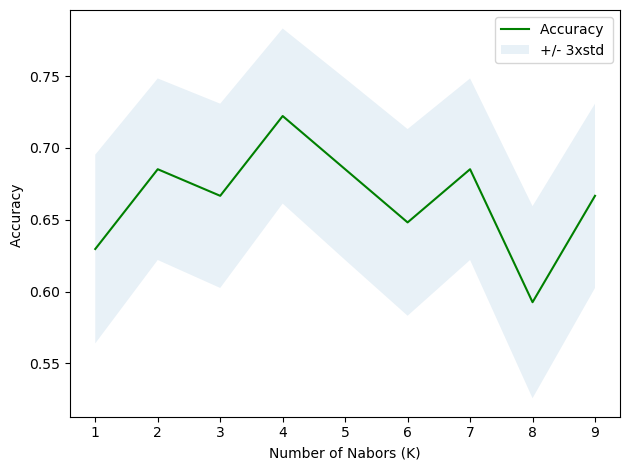

In [168]:
#k-value graph with accuary

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [169]:
print( "Highest Accuracy=", mean_acc.max(), "K=", mean_acc.argmax()+1,".") 

Highest Accuracy= 0.7222222222222222 K= 4 .


# DECISION TREE

In [170]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 


In [171]:
df=pd.read_csv("../inputs/progBook.csv")
df.head()

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,"3,829",The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,"1,406","The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,"1,658",Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,"1,325",How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706


In [172]:
#Dropping non-numeric columns

df.drop('Book_title', axis=1, inplace= True)

In [173]:
#Dropping non-numeric columns

df.drop('Description', axis=1, inplace= True)

In [174]:
print(df['Reviews'].iloc[0])

for i in range(0, df.shape[0], 1):
    df['Reviews'].iloc[i] = df['Reviews'].iloc[i].replace(',', '.')

print(df['Reviews'].iloc[0])

3,829
3.829


In [175]:
df.head()

,Rating,Reviews,Number_Of_Pages,Type,Price
0,4.17,3.829,105,Hardcover,9.323529
1,4.01,1.406,527,Hardcover,11.000000
2,3.33,0,50,Kindle Edition,11.267647
3,3.97,1.658,393,Hardcover,12.873529
4,4.06,1.325,305,Kindle Edition,13.164706


In [176]:
#X matrix of values to be used for prediction
#y is data to predict

X=df[["Rating","Reviews","Number_Of_Pages","Price"]].values
X[0:5]

array([[4.17, '3.829', 105, 9.323529412],
       [4.01, '1.406', 527, 11.0],
       [3.33, '0', 50, 11.26764706],
       [3.97, '1.658', 393, 12.87352941],
       [4.06, '1.325', 305, 13.16470588]], dtype=object)

In [177]:
y=df[["Type"]].values
y[0:5]

array([['Hardcover'],
       ['Hardcover'],
       ['Kindle Edition'],
       ['Hardcover'],
       ['Kindle Edition']], dtype=object)

In [178]:
# Train and test datas

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=3)

In [179]:
#train and test datasets shapes must be compatible

print("X_train shape:",X_train.shape," y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape," y_test shape:",y_test.shape)

X_train shape: (189, 4)  y_train shape: (189, 1)
X_test shape: (82, 4)  y_test shape: (82, 1)


In [180]:
TypeTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
TypeTree 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [181]:
#model training

TypeTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [182]:
#estimate

estimated=TypeTree.predict(X_test)

In [183]:
estimated[0:5]

array(['Paperback', 'Paperback', 'Paperback', 'Hardcover', 'Hardcover'],
      dtype=object)

In [184]:
y_test[0:5]

array([['Paperback'],
       ['Paperback'],
       ['Paperback'],
       ['Paperback'],
       ['Paperback']], dtype=object)

In [185]:
# Accuracy of the model

from sklearn import metrics
print ("Decision Tree Accuracy: ",metrics.accuracy_score(y_test,estimated))

Decision Tree Accuracy:  0.5365853658536586


In [186]:
from sklearn import tree
from sklearn.tree import export_graphviz


In [187]:
# Visualization of the tree
from sklearn.tree import export_graphviz
featureNames = df.columns[0:4]
targetNames = df["Type"].unique().tolist()
out=tree.export_graphviz(TypeTree,feature_names=featureNames, out_file='tree.dot', 
                         class_names= np.unique(y_train), filled=True,precision = 2,  special_characters=True,rotate=False) 

In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=100'])

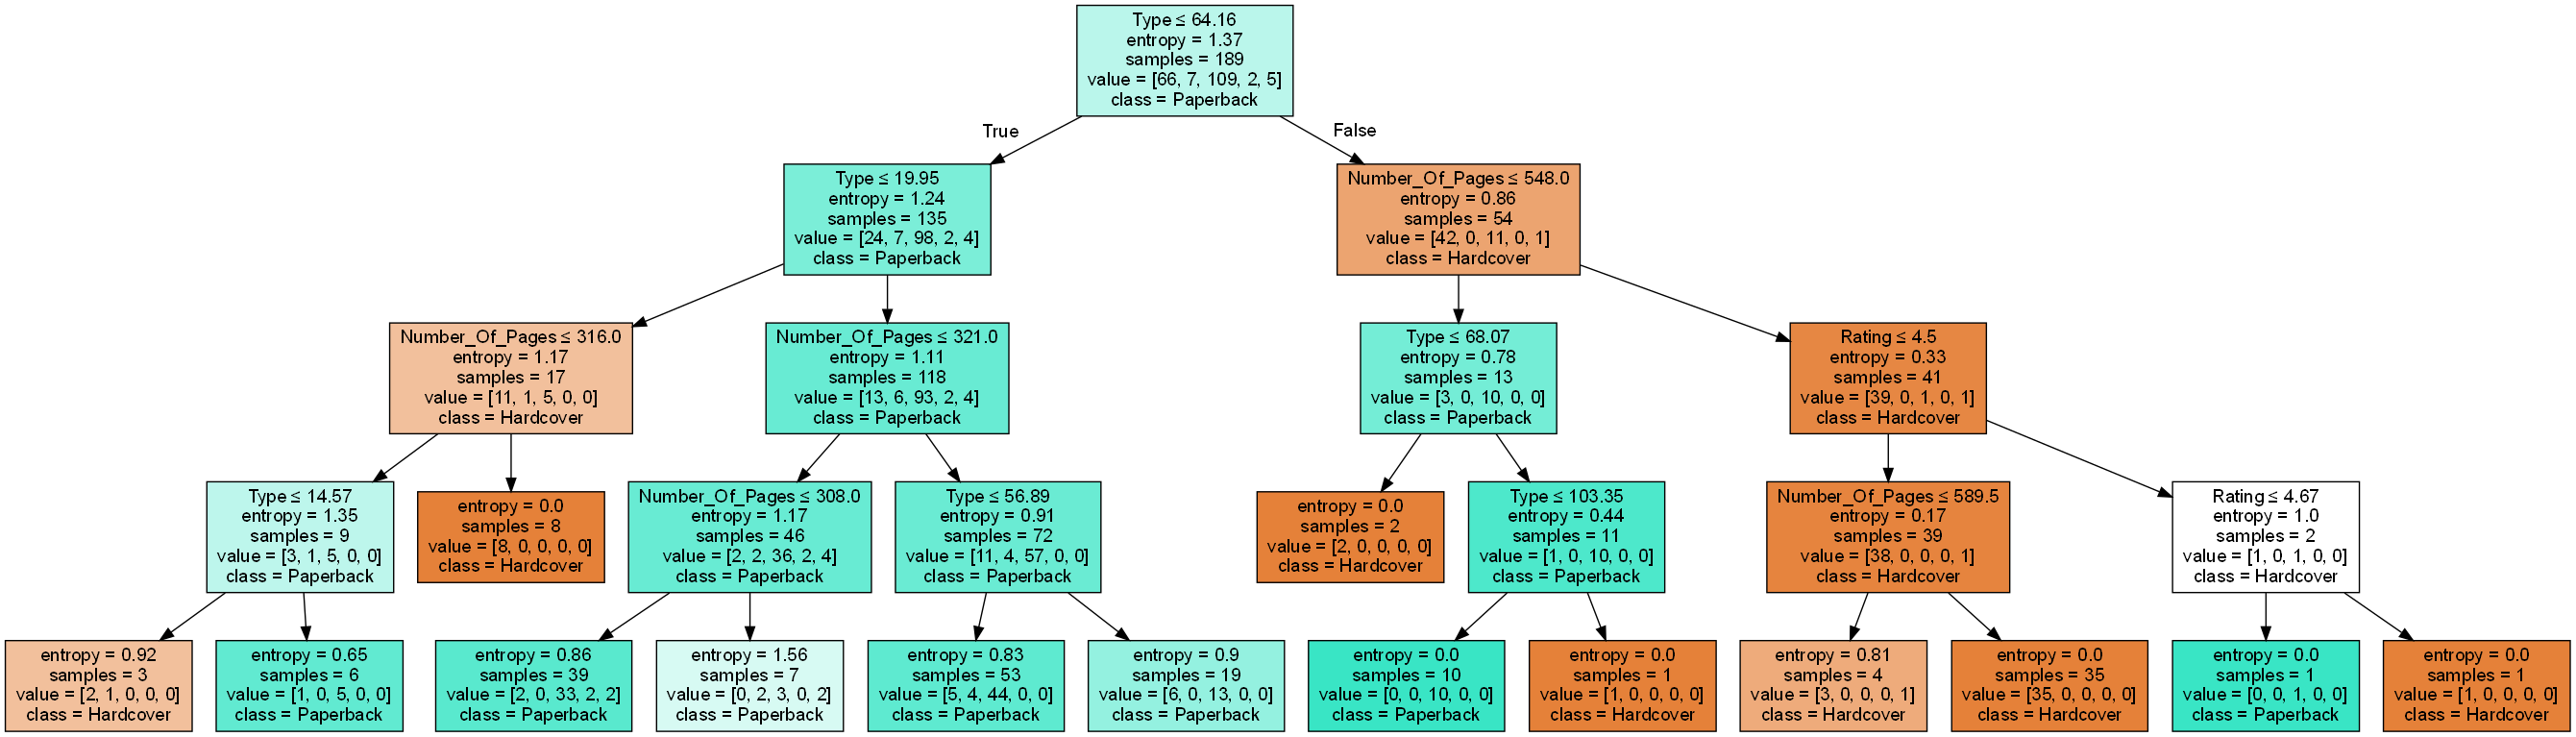

In [188]:
from IPython.display import Image
Image(filename = 'tree.png')

# LİNEAR REGRESSION

In [189]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [190]:
df = pd.read_csv('../inputs/progBook.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rating           271 non-null    float64
 1   Reviews          271 non-null    object 
 2   Book_title       271 non-null    object 
 3   Description      271 non-null    object 
 4   Number_Of_Pages  271 non-null    int64  
 5   Type             271 non-null    object 
 6   Price            271 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.9+ KB


In [191]:
df.head()

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,"3,829",The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,"1,406","The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,"1,658",Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,"1,325",How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706


In [192]:
df.tail()

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
266,3.76,0,3D Game Engine Architecture: Engineering Real-...,Dave Eberly's 3D Game Engine Design was the fi...,752,Hardcover,203.108823
267,3.94,22,An Introduction to Database Systems,"Continuing in the eighth edition, An Introduct...",1040,Paperback,212.097059
268,4.49,36,"The Art of Computer Programming, Volumes 1-3 B...",Knuth's classic work has been widely acclaimed...,896,Boxed Set - Hardcover,220.385294
269,4.77,4,"The Art of Computer Programming, Volumes 1-4a ...","""The bible of all fundamental algorithms and t...",3168,Hardcover,220.385294
270,3.84,5,A Discipline for Software Engineering,Designed to help individual programmers develo...,789,Hardcover,235.650000


In [193]:
cdf = df[['Price','Number_Of_Pages','Rating','Reviews']]
cdf.head(5)

,Price,Number_Of_Pages,Rating,Reviews
0,9.323529,105,4.17,"3,829"
1,11.000000,527,4.01,"1,406"
2,11.267647,50,3.33,0
3,12.873529,393,3.97,"1,658"
4,13.164706,305,4.06,"1,325"


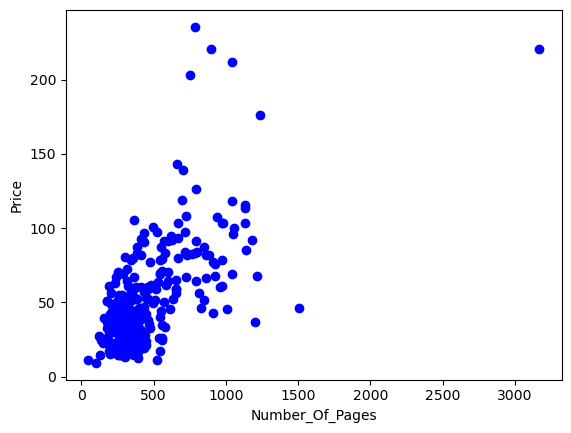

In [194]:
plt.scatter(cdf.Number_Of_Pages,cdf.Price,color="blue")
plt.xlabel("Number_Of_Pages")
plt.ylabel("Price")
plt.show()

In [195]:
#Array used for separating 80% of the data as a train
msk = np.random.rand(len(df)) < 0.8 
train = cdf[msk] 
test = cdf[~msk] 

(0.0, 250.0)

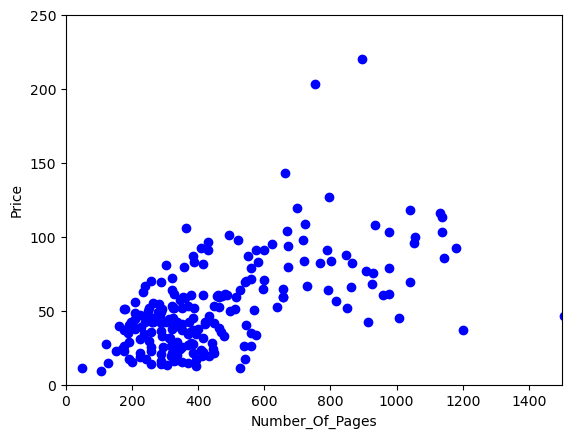

In [196]:
plt.scatter(train.Number_Of_Pages,train.Price,color="blue")
plt.xlabel("Number_Of_Pages")
plt.ylabel("Price")
plt.xlim(0,1500)
plt.ylim(0,250)

In [197]:
#Training of the model

from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[["Number_Of_Pages"]])

In [198]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Number_Of_Pages']])
train_y = np.asanyarray(train[['Price']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.06689595]]
Intercept:  [21.82861539]


(0.0, 250.0)

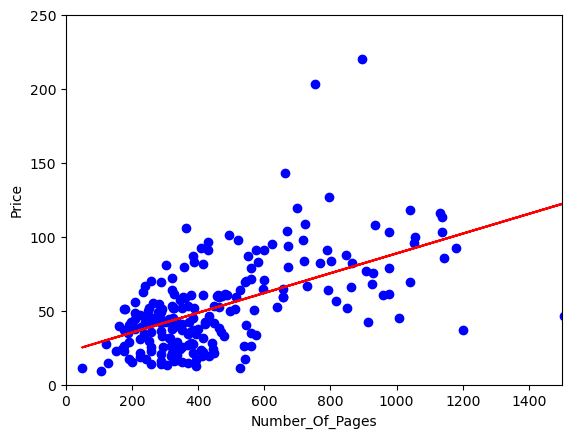

In [199]:
plt.scatter(train.Number_Of_Pages, train.Price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Number_Of_Pages")
plt.ylabel("Price")
plt.xlim(0,1500)
plt.ylim(0,250)